# Table of Contents
 <p><div class="lev1 toc-item"><a href="#分類問題　ー機械学習ライブラリscikit-learnの活用" data-toc-modified-id="分類問題　ー機械学習ライブラリscikit-learnの活用-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>分類問題　ー機械学習ライブラリscikit-learnの活用</a></div><div class="lev2 toc-item"><a href="#scikit-learnの活用へのファーストステップ" data-toc-modified-id="scikit-learnの活用へのファーストステップ-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>scikit-learnの活用へのファーストステップ</a></div><div class="lev3 toc-item"><a href="#scikit-learnを使ったパーセプトロンのトレーニング" data-toc-modified-id="scikit-learnを使ったパーセプトロンのトレーニング-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>scikit-learnを使ったパーセプトロンのトレーニング</a></div><div class="lev1 toc-item"><a href="#カーネルSVMを使った非線形問題の求解" data-toc-modified-id="カーネルSVMを使った非線形問題の求解-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>カーネルSVMを使った非線形問題の求解</a></div><div class="lev2 toc-item"><a href="#カーネルトリックを使って分離超平面を高次元で特定" data-toc-modified-id="カーネルトリックを使って分離超平面を高次元で特定-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>カーネルトリックを使って分離超平面を高次元で特定</a></div><div class="lev3 toc-item"><a href="#パラメータ$\gamma$の影響" data-toc-modified-id="パラメータ$\gamma$の影響-211"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>パラメータ<span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-7-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>&amp;#x03B3;</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-142" role="math" style="width: 0.558em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.465em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.808em 1000.47em 2.688em -999.998em); top: -2.359em; left: 0.002em;"><span class="mrow" id="MathJax-Span-143"><span class="mi" id="MathJax-Span-144" style="font-family: STIXMathJax_Main-italic;">γ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.049em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.363em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.275em; border-left: 0px solid; width: 0px; height: 0.892em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>γ</mi></math></span></span><script type="math/tex" id="MathJax-Element-7">\gamma</script>の影響</a></div><div class="lev1 toc-item"><a href="#決定木学習" data-toc-modified-id="決定木学習-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>決定木学習</a></div><div class="lev2 toc-item"><a href="#情報利得の最大化：できるだけ高い効果を得る" data-toc-modified-id="情報利得の最大化：できるだけ高い効果を得る-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>情報利得の最大化：できるだけ高い効果を得る</a></div><div class="lev2 toc-item"><a href="#決定木の構築" data-toc-modified-id="決定木の構築-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>決定木の構築</a></div><div class="lev2 toc-item"><a href="#ランダムフォレストを使って、弱い学習アルゴリズムと強い学習アルゴリズムを結合する" data-toc-modified-id="ランダムフォレストを使って、弱い学習アルゴリズムと強い学習アルゴリズムを結合する-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>ランダムフォレストを使って、弱い学習アルゴリズムと強い学習アルゴリズムを結合する</a></div><div class="lev1 toc-item"><a href="#k近傍法：怠惰学習アルゴリズム" data-toc-modified-id="k近傍法：怠惰学習アルゴリズム-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>k近傍法：怠惰学習アルゴリズム</a></div><div class="lev1 toc-item"><a href="#まとめ" data-toc-modified-id="まとめ-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>まとめ</a></div>

# 分類問題　ー機械学習ライブラリscikit-learnの活用

## scikit-learnの活用へのファーストステップ

### scikit-learnを使ったパーセプトロンのトレーニング

In [5]:
from sklearn import datasets
import numpy as np

In [6]:
iris = datasets.load_iris()

In [7]:
type(iris)

sklearn.datasets.base.Bunch

In [8]:
X = iris.data[:, [2, 3]]
y = iris.target

In [9]:
print ("Class labels:", np.unique(y))

Class labels: [0 1 2]


In [10]:
from sklearn.cross_validation import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()

In [14]:
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
print(X_train[:,0])

[ 3.5  5.5  5.7  5.   5.8  3.9  6.1  4.7  3.8  4.9  5.1  4.5  5.   4.7  5.2
  4.5  1.6  5.1  4.2  3.6  4.   4.6  6.   1.5  1.1  5.3  4.2  1.7  1.5  4.9
  1.5  5.1  3.   1.4  4.5  6.1  4.2  1.4  5.9  5.7  5.8  5.6  1.6  1.6  5.1
  5.7  1.3  5.4  1.4  5.   5.4  1.3  1.4  5.8  1.4  1.3  1.7  4.   5.9  6.6
  1.4  1.5  1.4  4.5  4.4  1.2  1.7  4.3  1.5  6.9  3.3  6.4  4.4  1.5  4.8
  1.2  6.7  1.5  1.6  6.1  1.4  5.6  4.1  3.9  3.5  5.3  5.2  4.9  5.   1.6
  3.7  5.6  5.1  1.5  4.6  4.1  4.8  4.4  1.3  1.5  1.5  5.6  4.1  6.7  1.4]


In [16]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [17]:
print(X_train_std[:,0])

[-0.18295039  0.93066067  1.04202177  0.6522579   1.09770233  0.03977182
  1.26474398  0.48521625 -0.01590873  0.59657735  0.70793846  0.37385514
  0.6522579   0.48521625  0.76361901  0.37385514 -1.24088089  0.70793846
  0.20681348 -0.12726983  0.09545238  0.42953569  1.20906343 -1.29656144
 -1.51928365  0.81929956  0.20681348 -1.18520034 -1.29656144  0.59657735
 -1.29656144  0.70793846 -0.46135315 -1.35224199  0.37385514  1.26474398
  0.20681348 -1.35224199  1.15338288  1.04202177  1.09770233  0.98634122
 -1.24088089 -1.24088089  0.70793846  1.04202177 -1.40792255  0.87498011
 -1.35224199  0.6522579   0.87498011 -1.40792255 -1.35224199  1.09770233
 -1.35224199 -1.40792255 -1.18520034  0.09545238  1.15338288  1.54314675
 -1.35224199 -1.29656144 -1.35224199  0.37385514  0.31817459 -1.4636031
 -1.18520034  0.26249403 -1.29656144  1.71018841 -0.29431149  1.43178564
  0.31817459 -1.29656144  0.5408968  -1.4636031   1.5988273  -1.29656144
 -1.24088089  1.26474398 -1.35224199  0.98634122  0.

In [18]:
from sklearn.linear_model import Perceptron

In [19]:
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0, shuffle=True)
# どういう風にrandomizeされるんだっけ？

In [20]:
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [21]:
y_pred = ppn.predict(X_test_std)

In [22]:
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4


テスト用サンプルのサイズは$45(= 150*0.3)$

この場合の誤分類率は$4/45 = 0.089$

scikit-learnでは、様々な性能指標も実装されている。metricsモジュールにより提供される。

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


cf: **過学習**：モデルが、トレーニングデータセットのパターンを適切に認識するものの、未知のデータにたいしてうまく汎化できないこと。

過学習の検出と防止→Ch.05

In [25]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() +1
    
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # 各特徴量を一次元配列に変換して予測を実行
    Z = classifier.predict(np.array(np.array([xx1.ravel(), xx2.ravel()]).T))
    
    # 予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    
    # グリッドポイントの等高線のプロット
    # alphaは透明度を表す（The alpha blending value）
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl,1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

    '''
    #テストサンプルを目立たせる（点をoで表示）
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0])
    '''

In [26]:
test = (1,2,3)
if test:
    print ('a')

a


# カーネルSVMを使った非線形問題の求解

SVMが人気である理由のひとつ:　非線形分類の問題を解くために**カーネル化**することが容易

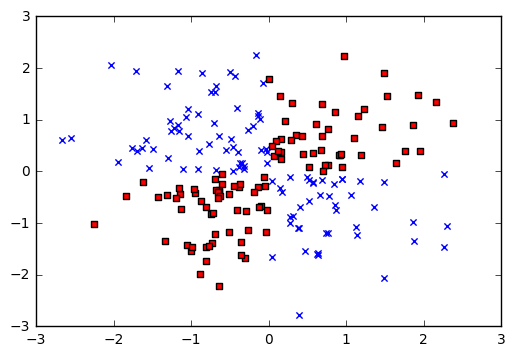

In [27]:
# XORゲート形式のデータセットを作成
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

# この部分よくわからず
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

直線で分離するのが難しいことは明らか。→カーネル法

カーネル法の基本的発想：　射影関数$\phi$を用いてデータの組み合わせを高次元空間に射影し、線形分離可能にする。（テキストの図を参照）

In [28]:
np.logical_xor(1, 1)

False

In [29]:
a = np.array(([1,2],[3,4],[5,6]))
b = [1,0,1]
print (a[:, 0])
print (a[b==1, 0])

[1 3 5]
1


/Users/KYO/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future


## カーネルトリックを使って分離超平面を高次元で特定

* 射影関数$\phi$を用いてトレーニングデータセットをより高い次元の特徴空間に変換
* 新しい特徴空間で、データを分類するための線形SVMをトレーニング

問題： **新しい特徴量を生成する計算コストが高い**
解決策： カーネルトリック（この部分よくわからず）

ドット積を二点間で陽に計算するとコストがかかるため（？）、カーネル関数を定義
$$k(x^{(i)}, x^{(j)}) = \phi(x^{(i)})^T \phi(x^{(j)}) $$

最も広く使用されているカーネルの１つ：**動的基底関数カーネル(Radial Basis Function Kernel, RBF Kernel, Gauss Kernel)**
$$k(x^{(i)}, x^{(j)}) = \exp(-\frac{\|x^{(i)} - x^{(j)}\|} {2 \sigma^2}) = \exp(-\gamma \|x^{(i)} - x^{(j)}\|)$$

カーネル：２つのサンプル間の「類似性を表す関数」と解釈可能

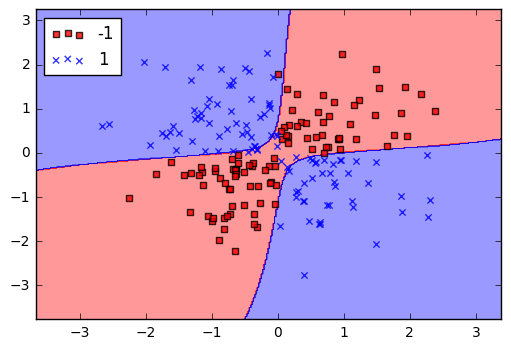

In [30]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

カーネルSVMはデータをかなりうまく分離している。

### パラメータ$\gamma$の影響
パラメータ$\gamma$ 小→トレーニングサンプルの影響力大→決定境界がより滑らかに

In [31]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() +1
    
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # 各特徴量を一次元配列に変換して予測を実行
    Z = classifier.predict(np.array(np.array([xx1.ravel(), xx2.ravel()]).T))
    
    # 予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    
    # グリッドポイントの等高線のプロット
    # alphaは透明度を表す（The alpha blending value）
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl,1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

    
    #テストサンプルを目立たせる（点をoで表示）
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:, 1], c='', alpha=1.0, linewidths=1, marker='o', s=55, label='test set')

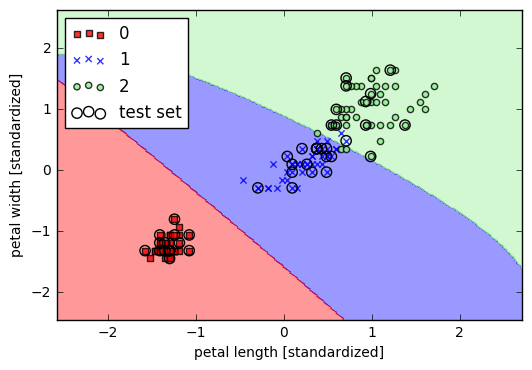

In [32]:

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# gamma小さめ
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

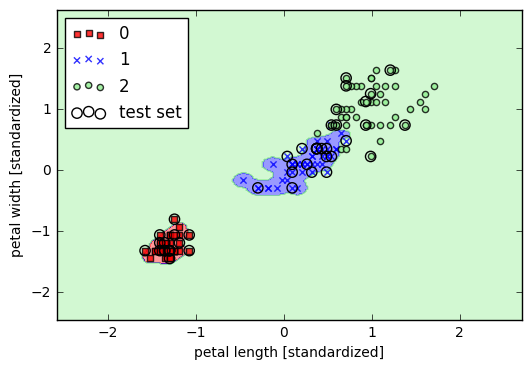

In [33]:
# gamma大きめ
# 過学習が起きている
svm = SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

# 決定木学習

決定木分類器：意味解釈可能性（得られた結果の意味を解釈しやすいか）に配慮する場合に魅力的なモデル

一連の質問に基づいて判断を下す

トレーニングデータセットの特徴量に基づいて、一連の質問を学習し、サンプルのクラスラベルを推測

**情報利得(Information Gain, IG)**を最大に

<img src="./book/code/ch03/images/03_15.png", width=500>

## 情報利得の最大化：できるだけ高い効果を得る

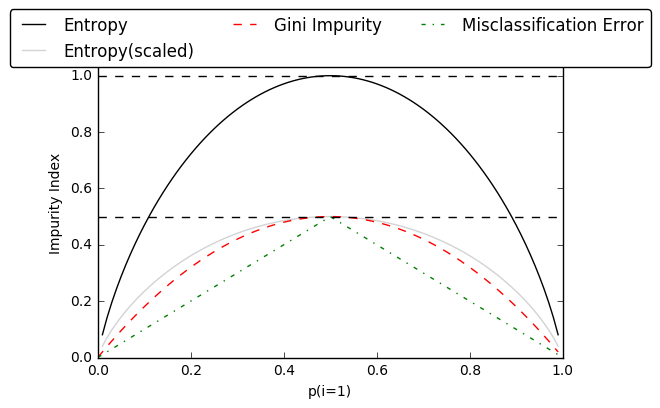

In [34]:
# ２分決定木の場合について、gini,entropy,errorを比較
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
    return p * (1-p) * 2

def entropy(p):
    return - p*np.log2(p) - (1-p)*np.log2(1-p)

def error(p):
    return 1 - np.max([p, 1-p])

# 確率を表す配列
x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)

for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                         ['Entropy', 'Entropy(scaled)', 'Gini Impurity', 'Misclassification Error'],
                         ['-','-','--','-.'],
                         ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')

plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

In [35]:
for a, b, c in zip([1,2,3],[4,5,6],[7,8,9]):
    print(a)
    print(b)
    print(c)

1
4
7
2
5
8
3
6
9


In [36]:
ax.legend?

GiniとEntropyはほとんど結果が変わらないことがわかる。不純度を表す関数の選択に時間を割くよりは、剪定などの他の問題に時間を割く方が有意義。

## 決定木の構築

決定木学習：特徴空間を矩型に分割。木が深くなるほど決定境界が複雑になり、過学習に陥りやすくなる。

scikit-learnを用いて、不純度としてエントロピーを用いて、最大の深さが３の決定木をトレーニングしてみる。

In [37]:
# Iris datasetの構築
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))

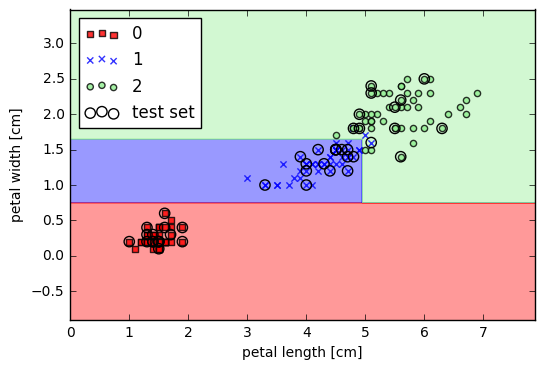

In [38]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105,150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

トレーニング後の決定木を.dotファイルとしてエクスポートできる

In [39]:
# graphvizをインストールする必要
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot')
feature_names=['petal length','petal width']

<img src="tree.png">

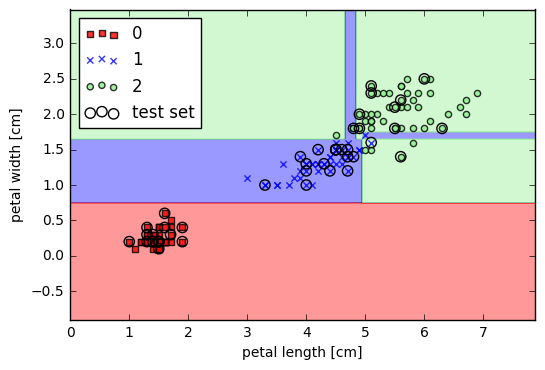

In [43]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105,150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

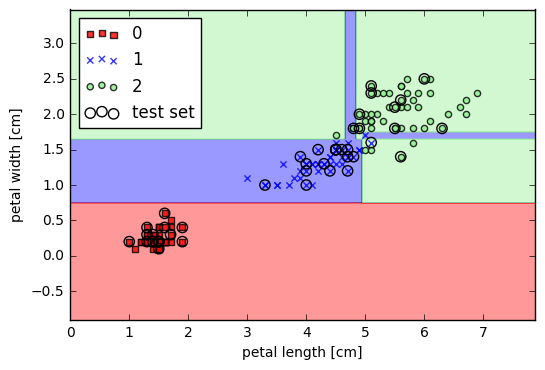

In [48]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=100, random_state=0)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105,150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

In [52]:
# graphvizをインストールする必要
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree100.dot')
feature_names=['petal length','petal width']

dot -Tpng tree.dot -o tree.png

<img src="tree100.png">

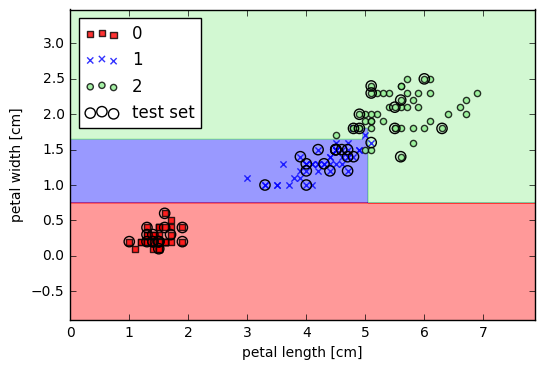

In [45]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105,150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

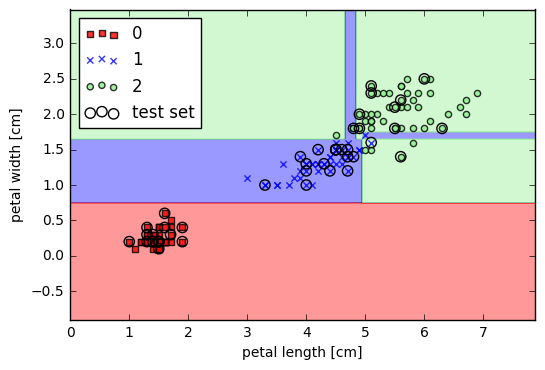

In [46]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105,150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

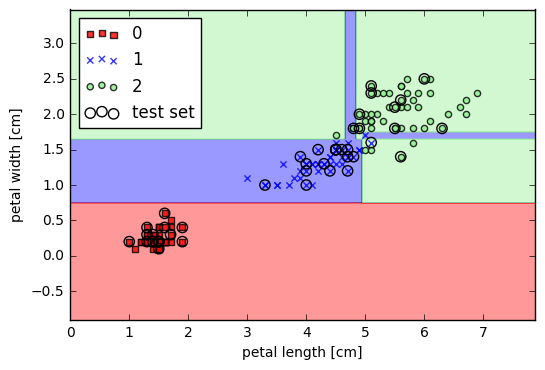

In [47]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105,150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

## ランダムフォレストを使って、弱い学習アルゴリズムと強い学習アルゴリズムを結合する

ランダムフォレスト：決定木の"アンサンブル"

アンサンブル学習：弱い学習アルゴリズムを組み合わせて強い学習アルゴリズム（過学習に陥りにくい）を作る

ちょっとよくわからなかった

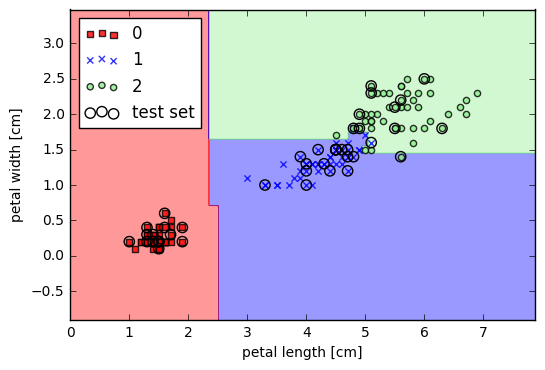

In [40]:
from sklearn.ensemble import RandomForestClassifier
# n_jobs: 複数のコアを用いて処理を並列化
forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1, n_jobs=2)

forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105,150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

# k近傍法：怠惰学習アルゴリズム

k-nearest neighbor classifier: KNN　ここまで学んできた学習アルゴリズムとは根本的に異なる。怠惰学習の代表例。

「怠惰」：トレーニングデータセットから識別関数を学習せず、トレーニングデータセットを暗記。

cf:パラメトリックvsノンパラメトリック

* パラメトリック：パーセプトロン、ロジスティック回帰、線形SVM

* ノンパラメトリック：決定木・ランダムフォレスト

k近傍法はノンパラの中でも*instance based learning*と呼ばれるサブカテゴリに属する。

* kの値・距離指標を選択
* 分類したいサンプルから近いkこの点を探し出す
* 多数決でラベルを決める

memory-based approach(KNNはこのサブカテゴリにも属する)の

* 利点：　新しいトレーニングデータを集めるとすぐに分類器が適応
* 欠点：　計算量が増加しやすい（？　データ構造を工夫するなどの解決策あり）　記憶域も問題になるかも。

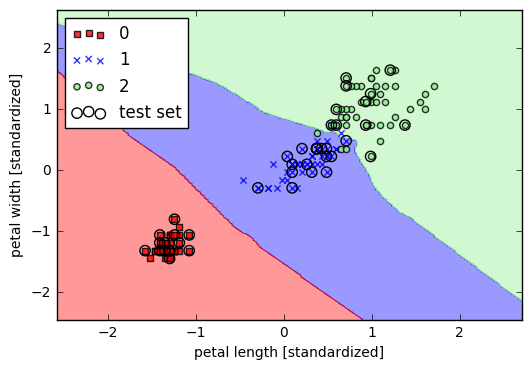

In [41]:
from sklearn.neighbors import KNeighborsClassifier
# ユークリッド距離を使用
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

* k: 過学習と学習不足のバランス
* 距離： データセットの特徴

をそれぞれ考慮して決める必要。実数値のサンプルにはユークリッド距離が用いられることが多い。**各特徴量が距離に等しく寄与するためにデータの標準化が必要**

次元の呪い：　次元の数が増えると特徴空間がまばらになり、推定が上手くいかなくなる。

* ロジスティック回帰: 正則化により過学習を回避
* 決定木やKNN: 正則化はできない。特徴選択と次元削減。

# まとめ

* 決定木: 意味解釈可能性
* ロジスティック回帰: 事象が生起する確率を予測可能（確率的勾配降下法によるオンライン学習に役立つ・・・？）
* SVM: カーネルトリックを用いて非線形問題の解を求められる。しかし、調整すべきパラメータ数が多い。
* ランダムフォレスト（などのアンサンブル手法）: SVMほどパラメータの調整は必要ないが、決定木ほど過学習に陥りやすくはない→実務上魅力的
* KNN: トレーニング不要。予測の計算コスト比較的大。

学習アルゴリズムがあっても、使えるデータ（特徴量）がないとお話しになりまへん。次章（データの前処理・特徴選択・次元削減）、乞うご期待。